<a href="https://colab.research.google.com/github/itzThillaiC/Tensorflow_models/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from numpy import unique , argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(x_train,y_train),(x_test,y_test)=load_data()

x_train= x_train.reshape((x_train.shape[0]),x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

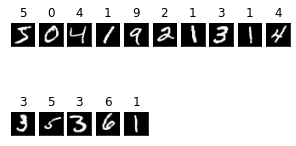

In [5]:
fig=plt.figure(figsize=(5,3))
for i in range(15):
  ax=fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
  ax.imshow(np.squeeze(x_train[i]),cmap='gray')
  ax.set_title(y_train[i])

In [7]:
img_shape=x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48,(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [11]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)             

In [12]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
x=model.fit(x_train,y_train,epochs=10,batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
422/422 - 42s - loss: 0.2556 - accuracy: 0.9214 - val_loss: 0.0595 - val_accuracy: 0.9827 - 42s/epoch - 98ms/step
Epoch 2/10
422/422 - 47s - loss: 0.0825 - accuracy: 0.9738 - val_loss: 0.0380 - val_accuracy: 0.9900 - 47s/epoch - 111ms/step
Epoch 3/10
422/422 - 48s - loss: 0.0606 - accuracy: 0.9812 - val_loss: 0.0314 - val_accuracy: 0.9905 - 48s/epoch - 113ms/step
Epoch 4/10
422/422 - 56s - loss: 0.0496 - accuracy: 0.9843 - val_loss: 0.0322 - val_accuracy: 0.9900 - 56s/epoch - 133ms/step
Epoch 5/10
422/422 - 51s - loss: 0.0418 - accuracy: 0.9867 - val_loss: 0.0315 - val_accuracy: 0.9913 - 51s/epoch - 122ms/step
Epoch 6/10
422/422 - 45s - loss: 0.0354 - accuracy: 0.9883 - val_loss: 0.0298 - val_accuracy: 0.9928 - 45s/epoch - 107ms/step
Epoch 7/10
422/422 - 41s - loss: 0.0327 - accuracy: 0.9894 - val_loss: 0.0264 - val_accuracy: 0.9928 - 41s/epoch - 97ms/step
Epoch 8/10
422/422 - 40s - loss: 0.0284 - accuracy: 0.9907 - val_loss: 0.0347 - val_accuracy: 0.9917 - 40s/epoch - 95ms/

In [14]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=0)
print(f'Accuracy:{accuracy*100}')

Accuracy:99.26999807357788


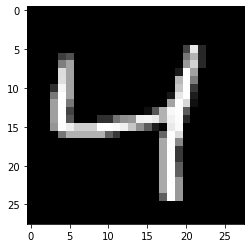

In [23]:
image=x_train[2]
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [24]:
image= image.reshape(1,image.shape[0],image.shape[1].image.shape[2])
p=model.predict([image])
print('Predicted: {}'.format(argmax(p)))